In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from prince import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
# Open the dataframe
df = pd.read_csv("dermatology.csv")
df

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25.0,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36.0,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28.0,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50.0,3


In [ ]:
# Drop missing values
data = df.dropna()

In [ ]:
# Show class sizes
data['class'].value_counts()

class
1    111
3     71
2     60
5     48
4     48
6     20
Name: count, dtype: int64

In [ ]:
# Show simple statistics
round(data.describe(),2)

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
count,358.00,358.00,358.00,358.00,358.00,358.00,358.00,358.00,358.00,358.00,...,358.00,358.00,358.00,358.00,358.00,358.00,358.00,358.00,358.00,358.00
mean,2.08,1.81,1.57,1.35,0.64,0.45,0.17,0.38,0.62,0.53,...,0.47,0.46,0.95,0.46,0.11,0.12,1.88,0.56,36.30,2.78
std,0.66,0.70,0.90,1.14,0.91,0.96,0.58,0.84,0.99,0.91,...,0.87,0.96,1.13,0.96,0.46,0.49,0.70,1.11,15.32,1.59
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,25.00,1.00
50%,2.00,2.00,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,35.00,3.00
75%,2.75,2.00,2.00,2.00,1.00,0.00,0.00,0.00,1.00,1.00,...,1.00,0.00,2.00,0.00,0.00,0.00,2.00,0.00,49.75,4.00
max,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,...,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,75.00,6.00


In [ ]:
# Shape of the dataset
data.shape

(358, 35)

In [ ]:
# Display the data
data

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25.0,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36.0,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28.0,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50.0,3


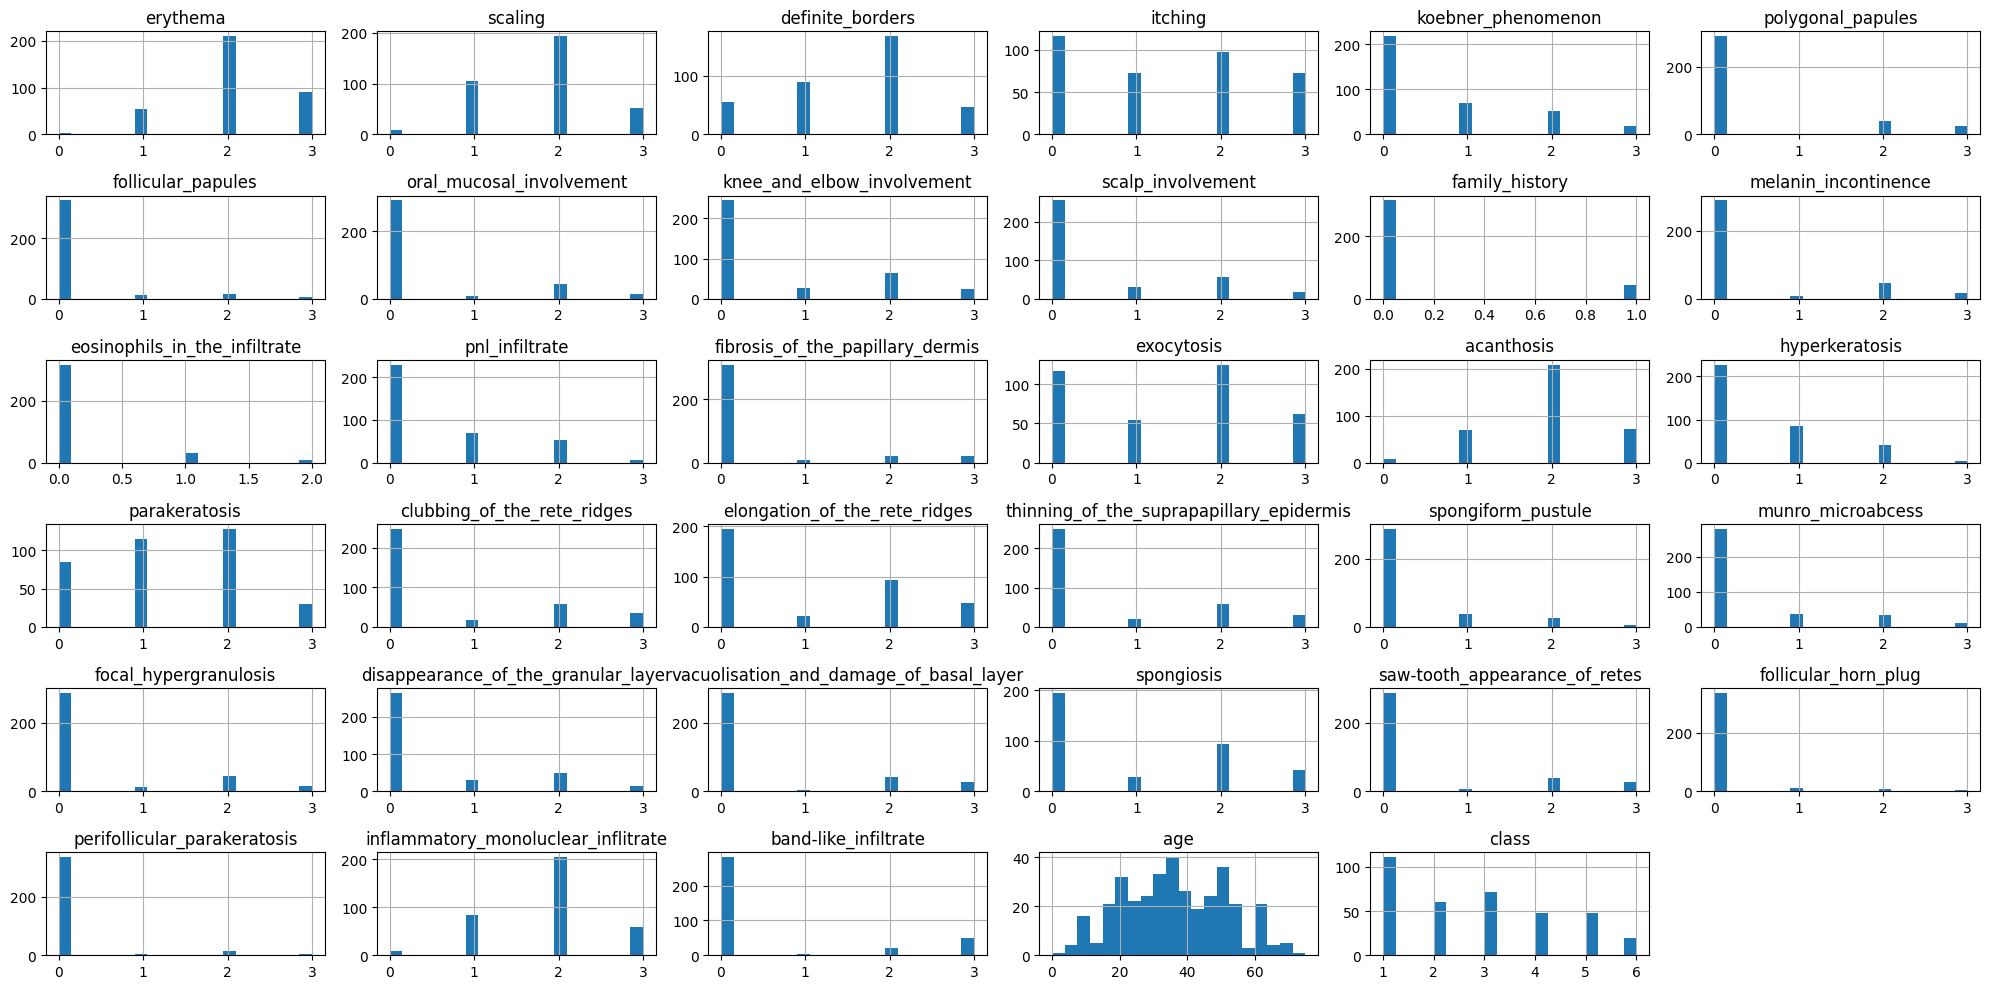

In [ ]:
# Histograms for all features

data.hist(figsize=(20, 10), bins=20)
plt.tight_layout()
plt.show()

In [ ]:
# Correlation
correlation_matrix = data.corr()

display(correlation_matrix)

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
erythema,1.000000,0.428769,0.248062,-0.033157,-0.008496,0.028225,-0.115275,-0.033391,0.138519,0.180740,...,0.153229,-0.003972,0.038837,-0.012408,-0.008997,0.006100,0.093026,-0.013850,-0.005028,-0.324846
scaling,0.428769,1.000000,0.347106,-0.072191,-0.009033,-0.075013,-0.098665,-0.084815,0.294258,0.295932,...,0.205046,-0.113133,0.023095,-0.118109,-0.014702,-0.015402,-0.008453,-0.134966,0.016006,-0.458499
definite_borders,0.248062,0.347106,1.000000,-0.058534,0.239778,0.322657,-0.176715,0.280341,0.301187,0.261495,...,0.350007,0.291443,-0.252643,0.267409,-0.093264,-0.131788,0.124812,0.275099,0.138493,-0.381456
itching,-0.033157,-0.072191,-0.058534,1.000000,0.280039,0.412525,-0.144027,0.361761,-0.296824,-0.152562,...,-0.190548,0.371404,0.003028,0.380075,-0.176096,-0.184385,0.051553,0.389887,0.048053,0.039744
koebner_phenomenon,-0.008496,-0.009033,0.239778,0.280039,1.000000,0.388233,-0.175676,0.387937,-0.065438,0.013496,...,0.002588,0.372236,0.006726,0.377539,-0.150348,-0.166956,0.110295,0.377323,0.081162,-0.089586
polygonal_papules,0.028225,-0.075013,0.322657,0.412525,0.388233,1.000000,-0.139384,0.863269,-0.278843,-0.258231,...,-0.122467,0.911598,0.091031,0.894775,-0.097084,-0.112007,0.258753,0.904112,0.096953,0.064451
follicular_papules,-0.115275,-0.098665,-0.176715,-0.144027,-0.175676,-0.139384,1.000000,-0.134484,0.220849,-0.007320,...,-0.161487,-0.142335,-0.012624,-0.141489,0.784991,0.844721,-0.093833,-0.136311,-0.371368,0.488708
oral_mucosal_involvement,-0.033391,-0.084815,0.280341,0.361761,0.387937,0.863269,-0.134484,1.000000,-0.286160,-0.264638,...,-0.109676,0.886238,0.129879,0.873730,-0.084040,-0.108070,0.276068,0.890685,0.111047,0.062185
knee_and_elbow_involvement,0.138519,0.294258,0.301187,-0.296824,-0.065438,-0.278843,0.220849,-0.286160,1.000000,0.659286,...,0.480594,-0.285184,-0.417851,-0.283383,0.231977,0.256811,-0.079246,-0.279753,-0.078267,-0.382276
scalp_involvement,0.180740,0.295932,0.261495,-0.152562,0.013496,-0.258231,-0.007320,-0.264638,0.659286,1.000000,...,0.485260,-0.257697,-0.425421,-0.262429,-0.055091,-0.020456,0.027887,-0.255333,0.036412,-0.534716


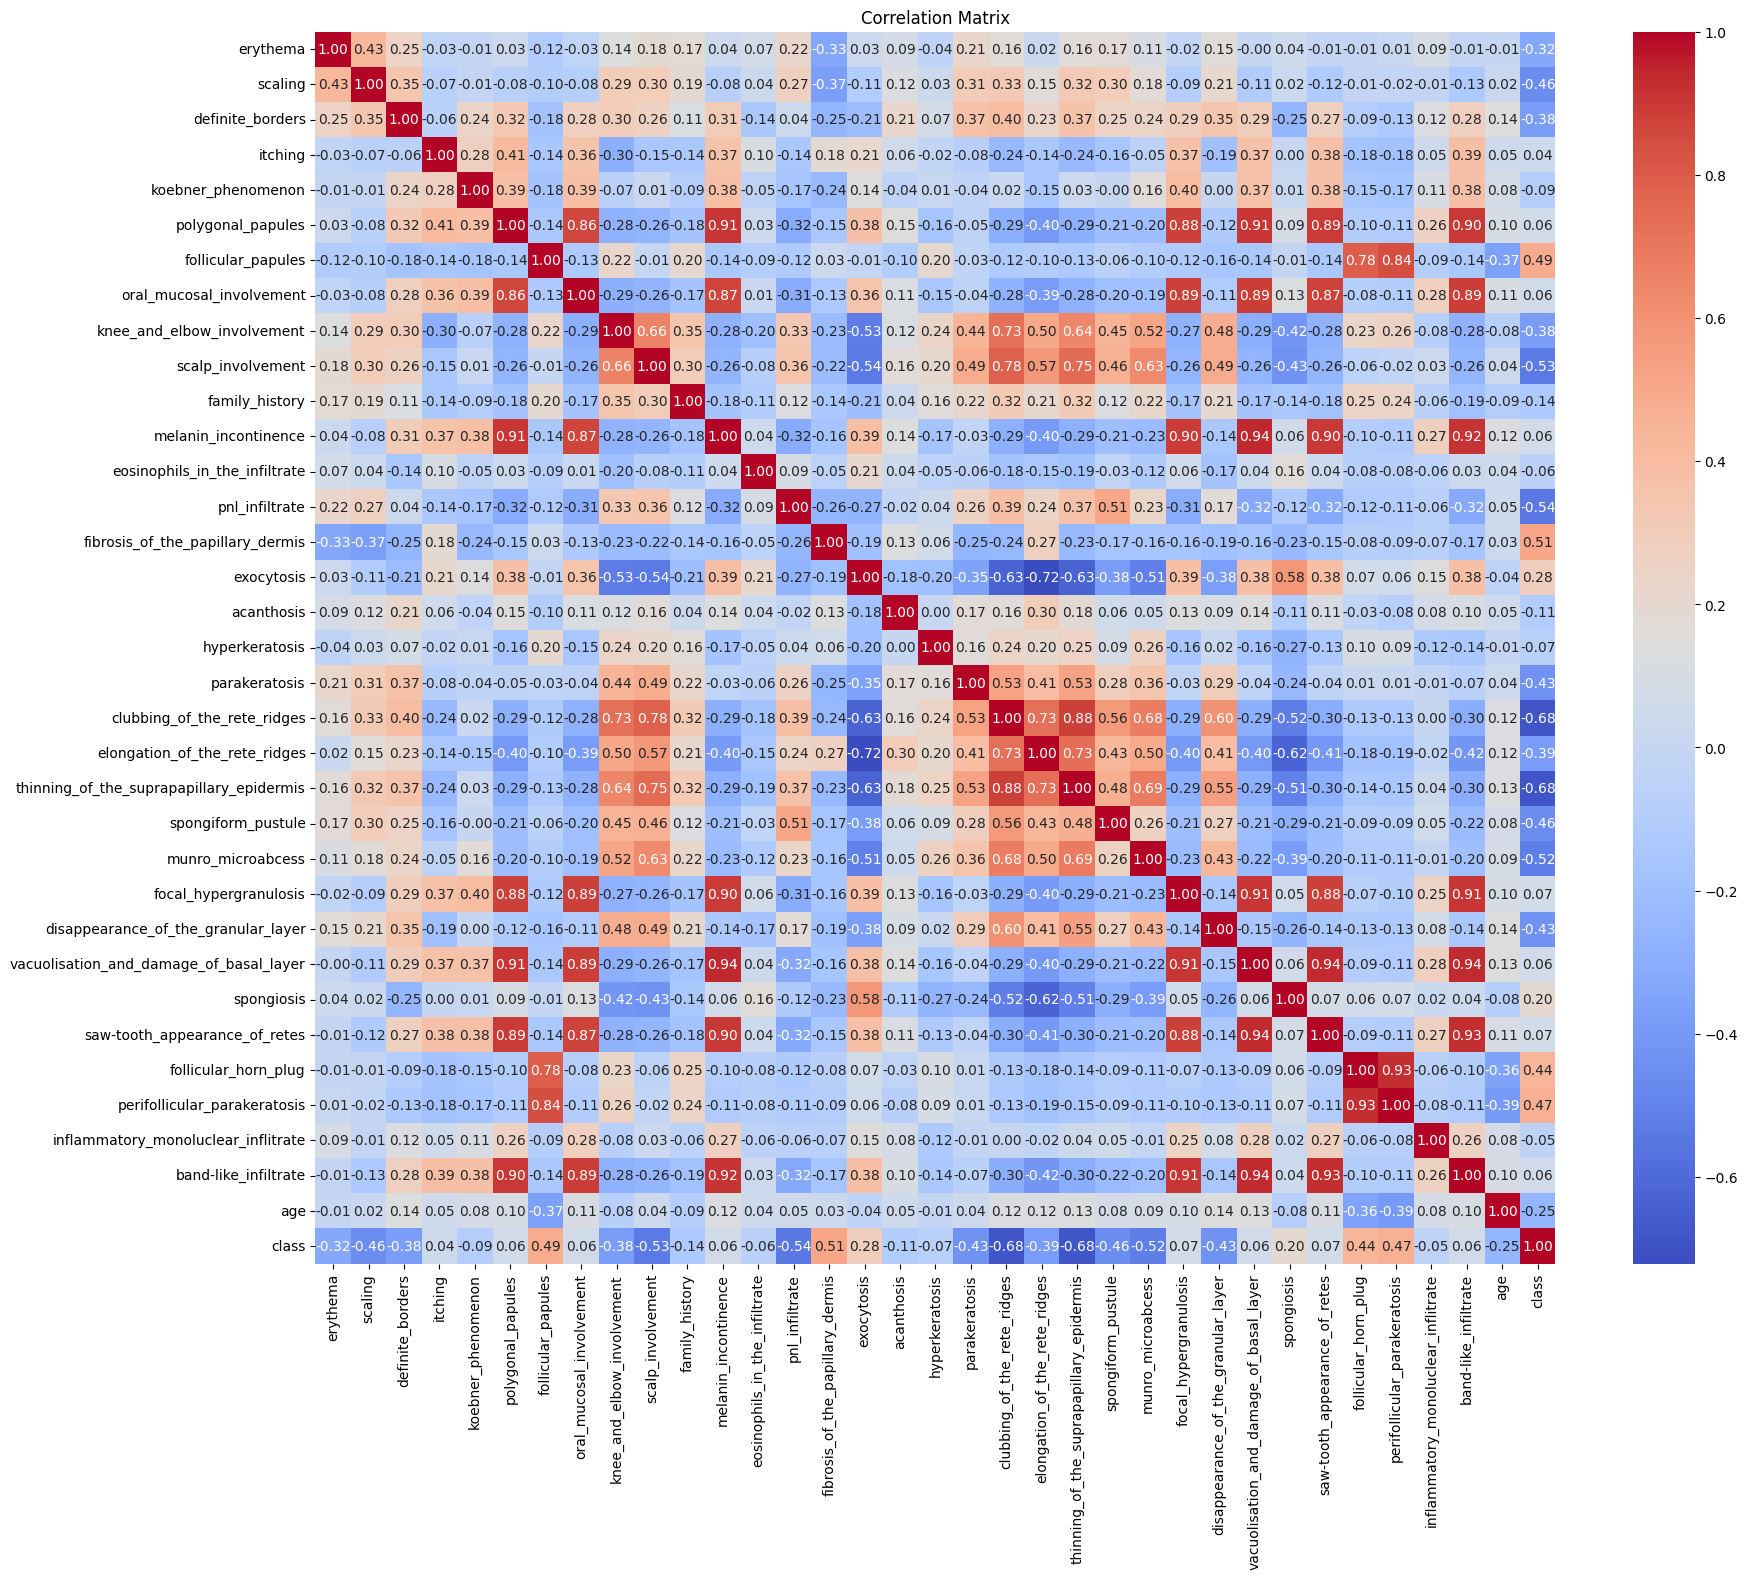

In [ ]:
# Plot the correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

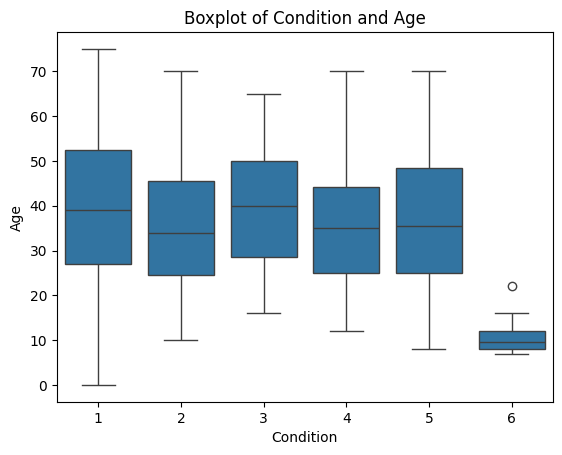

In [ ]:
# Boxplots
sns.boxplot(x='class', y='age', data=data)

plt.title("Boxplot of Condition and Age")
plt.xlabel("Condition")
plt.ylabel('Age')
plt.show()

In [ ]:
# Split target and variables
X = data.drop('class', axis=1)
y = data['class']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

# Convert X_scaled to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age
0,-0.117801,0.275119,-1.744938,1.451510,-0.701834,-0.470847,-0.296029,-0.454293,0.381330,-0.582526,...,-0.467029,-0.545511,-0.480813,1.818459,-0.477957,-0.23352,-0.237885,-1.255960,-0.504915,1.222227
1,1.388370,1.702547,1.589694,0.569268,0.400169,-0.470847,-0.296029,-0.454293,0.381330,0.515076,...,-0.467029,-0.545511,-0.480813,-0.842338,-0.477957,-0.23352,-0.237885,-1.255960,-0.504915,-1.849038
2,-0.117801,-1.152309,0.478150,1.451510,0.400169,2.670081,-0.296029,3.133288,-0.629901,-0.582526,...,1.871380,-0.545511,1.605623,1.818459,1.608735,-0.23352,-0.237885,0.175994,2.206480,-0.672809
3,-0.117801,0.275119,0.478150,-1.195216,-0.701834,-0.470847,-0.296029,-0.454293,2.403792,1.612678,...,-0.467029,2.900835,-0.480813,-0.842338,-0.477957,-0.23352,-0.237885,1.607949,-0.504915,0.242036
4,-0.117801,1.702547,0.478150,0.569268,1.502171,1.623105,-0.296029,1.937428,-0.629901,-0.582526,...,1.871380,1.752053,2.648840,0.931527,2.652081,-0.23352,-0.237885,0.175994,2.206480,0.568766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,-0.117801,-1.152309,-0.633394,-1.195216,0.400169,-0.470847,-0.296029,-0.454293,-0.629901,-0.582526,...,-0.467029,-0.545511,-0.480813,0.044594,-0.477957,-0.23352,-0.237885,0.175994,-0.504915,-0.738155
354,1.388370,0.275119,-0.633394,-1.195216,0.400169,-0.470847,-0.296029,-0.454293,-0.629901,-0.582526,...,-0.467029,0.603271,-0.480813,0.044594,-0.477957,-0.23352,-0.237885,0.175994,-0.504915,-0.019348
355,1.388370,0.275119,0.478150,0.569268,2.604174,1.623105,-0.296029,1.937428,-0.629901,-0.582526,...,3.040585,-0.545511,2.648840,-0.842338,2.652081,-0.23352,-0.237885,0.175994,2.206480,-0.542117
356,-0.117801,-1.152309,1.589694,-0.312974,1.502171,2.670081,-0.296029,1.937428,-0.629901,-0.582526,...,3.040585,-0.545511,1.605623,-0.842338,0.565389,-0.23352,-0.237885,0.175994,2.206480,0.895497


In [ ]:
# Initialize the LDA model
lda = LinearDiscriminantAnalysis()

# Fit the LDA model to the scaled data
lda.fit(X_scaled, y)

# Transform the scaled data using LDA
lda_data = lda.transform(X_scaled)

# Check the shape of the original and transformed data
print("Original data shape:", X_scaled.shape)
print("Transformed data shape:", lda_data.shape)

# Convert the transformed data to a DataFrame
lda_data = pd.DataFrame(lda_data, columns=[f'lda_component_{i+1}' for i in range(lda_data.shape[1])])
lda_data

Original data shape: (358, 34)
Transformed data shape: (358, 5)


,lda_component_1,lda_component_2,lda_component_3,lda_component_4,lda_component_5
0,-3.343492,-1.397334,-2.695190,-4.108045,2.197780
1,-4.977745,3.289215,2.902177,0.625011,1.076224
2,16.896737,-0.033373,1.073573,-0.779377,0.602143
3,-4.737803,4.140480,2.712284,0.875952,-0.086871
4,15.921756,0.782352,1.656744,-0.484206,-0.731441
...,...,...,...,...,...
353,-3.720835,-0.750467,-1.657052,-2.708782,-1.885702
354,-3.244768,-0.680774,-2.004010,-2.912255,-2.020027
355,17.421767,0.725558,1.366686,-0.166739,0.493744
356,16.137784,0.597303,0.821546,0.240973,-1.591766


## Logistic Regression

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Accuracy using Original Data: 0.9583333333333334


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


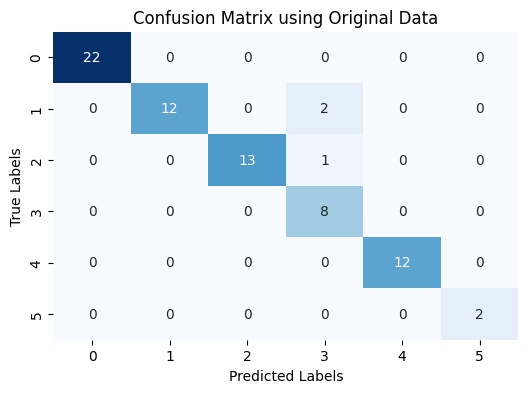

In [ ]:
# Logistic Regression (Original data)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define hyperparameters to tune (l1 penalty = Lasso, l2 = Ridge. Bring the coefficients to 0)
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['saga']
}

# Initialize logistic regression model
logreg = LogisticRegression(solver='saga', max_iter=10000, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Initialize logistic regression with the best hyperparameters
best_logreg = LogisticRegression(**best_params)

# Fit the model on the training data
best_logreg.fit(X_train, y_train)

# Predicting on the test set
y_pred = best_logreg.predict(X_test)

# Evaluating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using Original Data:", accuracy)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix using Original Data")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Best hyperparameters using LDA Data: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
Accuracy using LDA Data: 0.9861111111111112


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


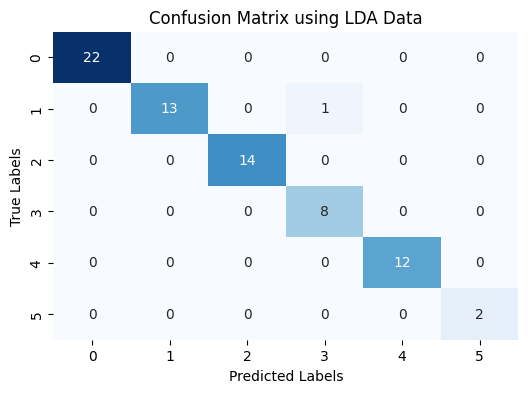

In [ ]:
# Logistic Regression (LDA data)

# Split target and variables
X_lda = lda_data
y_lda = data['class']

# Splitting the LDA-transformed data into features (X) and target variable (y)
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X_lda, y_lda, test_size=0.2, random_state=42)

# Define hyperparameters to tune
param_grid_lda = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['saga']
}

# Initialize logistic regression model
logreg_lda = LogisticRegression(solver='saga', max_iter=10000, random_state=42)

# Initialize GridSearchCV
grid_search_lda = GridSearchCV(estimator=logreg_lda, param_grid=param_grid_lda, cv=5)

# Perform grid search to find the best hyperparameters
grid_search_lda.fit(X_train_lda, y_train_lda)

# Get the best hyperparameters
best_params_lda = grid_search_lda.best_params_
print("Best hyperparameters using LDA Data:", best_params_lda)

# Initialize logistic regression with the best hyperparameters
best_logreg_lda = LogisticRegression(**best_params_lda)

# Fit the model on the training data
best_logreg_lda.fit(X_train_lda, y_train_lda)

# Predicting on the test set
y_pred_lda = best_logreg_lda.predict(X_test_lda)

# Evaluating the accuracy
accuracy_lda = accuracy_score(y_test_lda, y_pred_lda)
print("Accuracy using LDA Data:", accuracy_lda)

# Compute confusion matrix
cm_lda = confusion_matrix(y_test_lda, y_pred_lda)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lda, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix using LDA Data")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


## Support Vector Classifier (SVC)

Best hyperparameters for SVC using Original Data: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy using Original Data with SVC: 0.9722222222222222


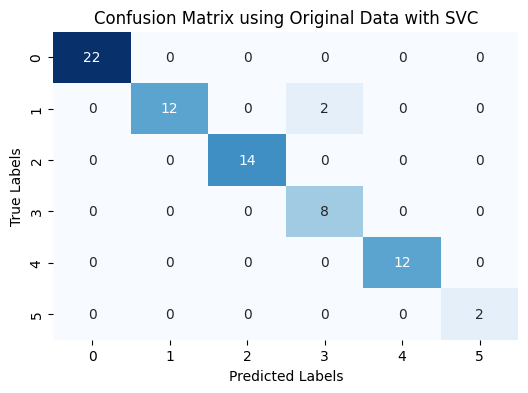

In [ ]:
# Support Vector Machine (Original data)

# Define hyperparameters to tune
param_grid_svc = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Initialize SVC model
svc = SVC()

# Initialize GridSearchCV
grid_search_svc = GridSearchCV(estimator=svc, param_grid=param_grid_svc, cv=5)

# Perform grid search to find the best hyperparameters
grid_search_svc.fit(X_train, y_train)

# Get the best hyperparameters
best_params_svc = grid_search_svc.best_params_
print("Best hyperparameters for SVC using Original Data:", best_params_svc)

# Initialize SVC with the best hyperparameters
best_svc = SVC(**best_params_svc, random_state=42)

# Fit the model on the training data
best_svc.fit(X_train, y_train)

# Predicting on the test set
y_pred_svc = best_svc.predict(X_test)

# Evaluating the accuracy
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Accuracy using Original Data with SVC:", accuracy_svc)

# Compute confusion matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svc, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix using Original Data with SVC")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()



Best hyperparameters for SVC using LDA Data: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy using LDA Data with SVC: 0.9861111111111112


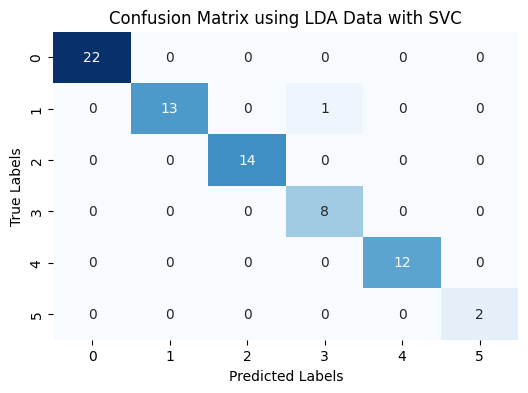

In [ ]:
# Support Vector Machine (LDA data)

# Define hyperparameters to tune
param_grid_svc_lda = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Initialize SVC model
svc_lda = SVC()

# Initialize GridSearchCV
grid_search_svc_lda = GridSearchCV(estimator=svc_lda, param_grid=param_grid_svc_lda, cv=5)

# Perform grid search to find the best hyperparameters
grid_search_svc_lda.fit(X_train_lda, y_train_lda)

# Get the best hyperparameters
best_params_svc_lda = grid_search_svc_lda.best_params_
print("Best hyperparameters for SVC using LDA Data:", best_params_svc_lda)

# Initialize SVC with the best hyperparameters
best_svc_lda = SVC(**best_params_svc_lda, random_state=42)

# Fit the model on the training data
best_svc_lda.fit(X_train_lda, y_train_lda)

# Predicting on the test set
y_pred_svc_lda = best_svc_lda.predict(X_test_lda)

# Evaluating the accuracy
accuracy_svc_lda = accuracy_score(y_test_lda, y_pred_svc_lda)
print("Accuracy using LDA Data with SVC:", accuracy_svc_lda)

# Compute confusion matrix
cm_svc_lda = confusion_matrix(y_test_lda, y_pred_svc_lda)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svc_lda, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix using LDA Data with SVC")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


## K-Nearest Neighbour

Best hyperparameters for KNN using Original Data: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
Accuracy using Original Data with KNN: 0.9166666666666666


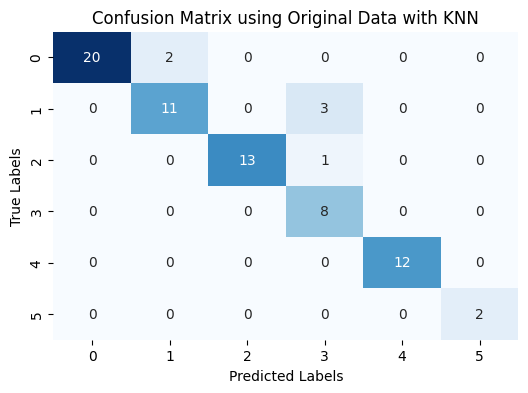

In [ ]:
## K-Nearest Neighbour (Original data)
np.random.seed(42)
# Define hyperparameters to tune
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Initialize KNN model
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5)

# Perform grid search to find the best hyperparameters
grid_search_knn.fit(X_train, y_train)

# Get the best hyperparameters
best_params_knn = grid_search_knn.best_params_
print("Best hyperparameters for KNN using Original Data:", best_params_knn)

# Initialize KNN with the best hyperparameters
best_knn = KNeighborsClassifier(**best_params_knn)

# Fit the model on the training data
best_knn.fit(X_train, y_train)

# Predicting on the test set
y_pred_knn = best_knn.predict(X_test)

# Evaluating the accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy using Original Data with KNN:", accuracy_knn)

# Compute confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix using Original Data with KNN")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Best hyperparameters for KNN using LDA Data: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuracy using LDA Data with KNN: 0.9861111111111112


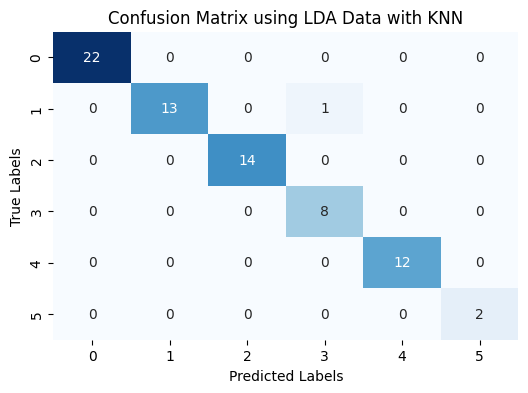

In [ ]:
# K-Nearest Neighbour (LDA data)
np.random.seed(42)
# Define hyperparameters to tune
param_grid_knn_lda = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Initialize KNN model
knn_lda = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search_knn_lda = GridSearchCV(estimator=knn_lda, param_grid=param_grid_knn_lda, cv=5)

# Perform grid search to find the best hyperparameters
grid_search_knn_lda.fit(X_train_lda, y_train_lda)

# Get the best hyperparameters
best_params_knn_lda = grid_search_knn_lda.best_params_
print("Best hyperparameters for KNN using LDA Data:", best_params_knn_lda)

# Initialize KNN with the best hyperparameters
best_knn_lda = KNeighborsClassifier(**best_params_knn_lda)

# Fit the model on the training data
best_knn_lda.fit(X_train_lda, y_train_lda)

# Predicting on the test set
y_pred_knn_lda = best_knn_lda.predict(X_test_lda)

# Evaluating the accuracy
accuracy_knn_lda = accuracy_score(y_test_lda, y_pred_knn_lda)
print("Accuracy using LDA Data with KNN:", accuracy_knn_lda)

# Compute confusion matrix
cm_knn_lda = confusion_matrix(y_test_lda, y_pred_knn_lda)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn_lda, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix using LDA Data with KNN")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


## Random Forest

Best hyperparameters for Random Forest using Original Data: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy using Original Data with Random Forest: 0.9861111111111112


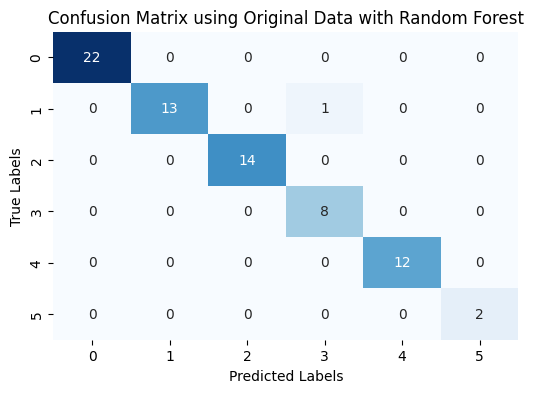

In [ ]:
# Random Forest (Original data)
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameters to tune
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest model
rf = RandomForestClassifier()

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5)

# Perform grid search to find the best hyperparameters
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_
print("Best hyperparameters for Random Forest using Original Data:", best_params_rf)

# Initialize Random Forest with the best hyperparameters
best_rf = RandomForestClassifier(**best_params_rf)

# Fit the model on the training data
best_rf.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = best_rf.predict(X_test)

# Evaluating the accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy using Original Data with Random Forest:", accuracy_rf)

# Compute confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix using Original Data with Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


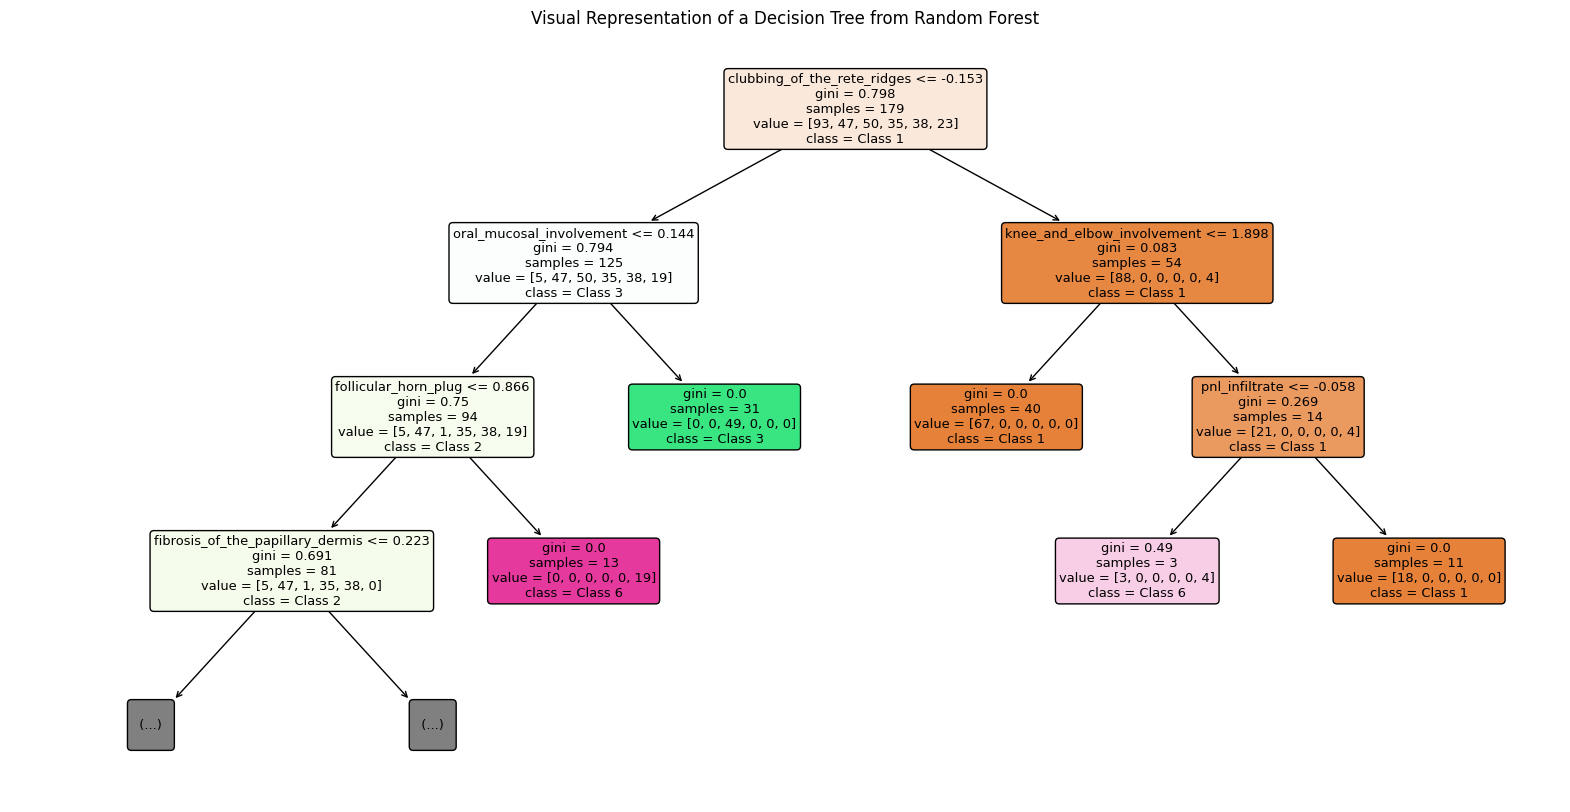

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
np.random.seed(42)
best_rf = RandomForestClassifier(**best_params_rf)
best_rf.fit(X_train, y_train)

# Select a single tree from the trained Random Forest model
single_tree = best_rf.estimators_[0]

# Plot the single decision tree
plt.figure(figsize=(20,10))
plot_tree(single_tree, filled=True, rounded=True,
          class_names=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6'],
          feature_names=X_train.columns, max_depth=3)
plt.title("Visual Representation of a Decision Tree from Random Forest")
plt.show()

Best hyperparameters for Random Forest using LDA Data: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy using LDA Data with Random Forest: 0.9722222222222222


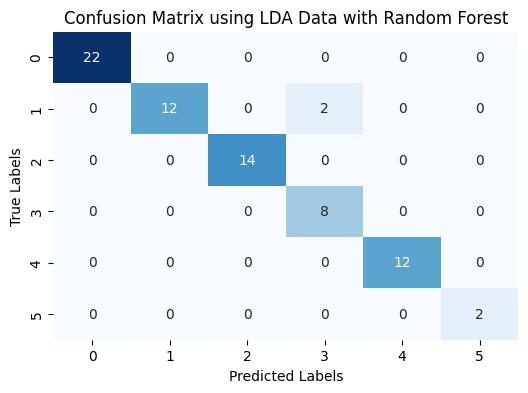

In [ ]:
# Random Forest (LDA data)
np.random.seed(42)
# Define hyperparameters to tune
param_grid_rf_lda = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest model
rf_lda = RandomForestClassifier()

# Initialize GridSearchCV
grid_search_rf_lda = GridSearchCV(estimator=rf_lda, param_grid=param_grid_rf_lda, cv=5)

# Perform grid search to find the best hyperparameters
grid_search_rf_lda.fit(X_train_lda, y_train_lda)

# Get the best hyperparameters
best_params_rf_lda = grid_search_rf_lda.best_params_
print("Best hyperparameters for Random Forest using LDA Data:", best_params_rf_lda)

# Initialize Random Forest with the best hyperparameters
best_rf_lda = RandomForestClassifier(**best_params_rf_lda)

# Fit the model on the training data
best_rf_lda.fit(X_train_lda, y_train_lda)

# Predicting on the test set
y_pred_rf_lda = best_rf_lda.predict(X_test_lda)

# Evaluating the accuracy
accuracy_rf_lda = accuracy_score(y_test_lda, y_pred_rf_lda)
print("Accuracy using LDA Data with Random Forest:", accuracy_rf_lda)

# Compute confusion matrix
cm_rf_lda = confusion_matrix(y_test_lda, y_pred_rf_lda)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf_lda, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix using LDA Data with Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


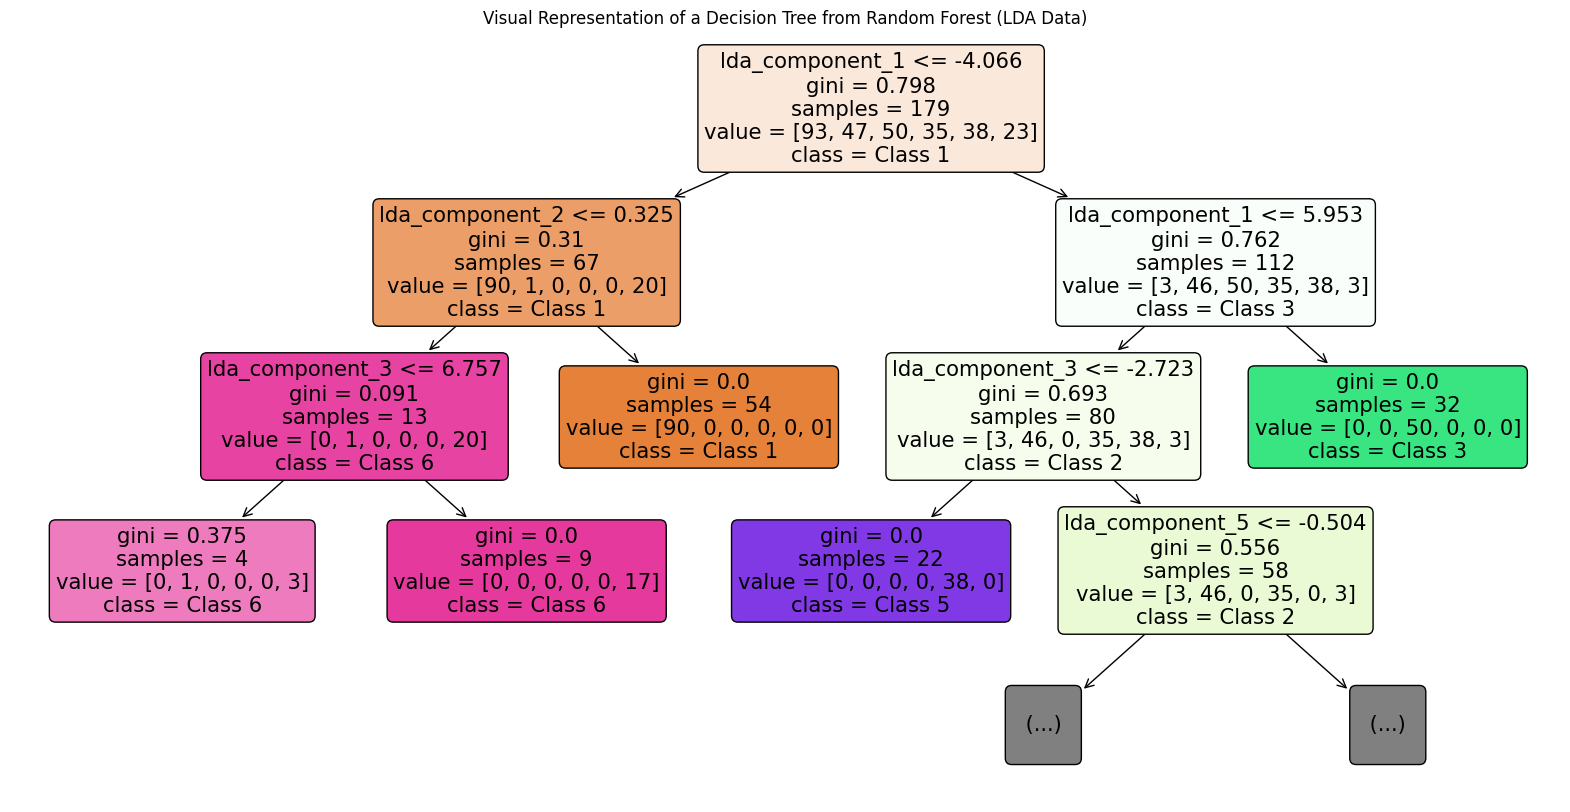

In [ ]:
np.random.seed(42)
best_rf_lda = RandomForestClassifier(**best_params_rf_lda)
best_rf_lda.fit(X_train_lda, y_train_lda)

# Select a single tree from the trained Random Forest model
single_tree_lda = best_rf_lda.estimators_[0]

# Plot the single decision tree
plt.figure(figsize=(20,10))
plot_tree(single_tree_lda, filled=True, rounded=True,
          class_names=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6'],
          feature_names=X_train_lda.columns, max_depth=3)
plt.title("Visual Representation of a Decision Tree from Random Forest (LDA Data)")
plt.show()

## Naive Bayes

Accuracy using Original Data with Gaussian Naive Bayes: 0.8333333333333334


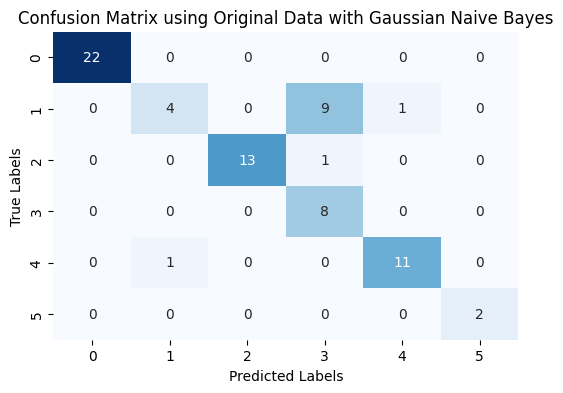

In [ ]:
# Naive Bayes (Original data)
np.random.seed(42)
# Initialize Gaussian Naive Bayes model
gnb = GaussianNB()

# Fit the model on the training data
gnb.fit(X_train, y_train)

# Predicting on the test set
y_pred_gnb = gnb.predict(X_test)

# Evaluating the accuracy
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print("Accuracy using Original Data with Gaussian Naive Bayes:", accuracy_gnb)

# Compute confusion matrix
cm_gnb = confusion_matrix(y_test, y_pred_gnb)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gnb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix using Original Data with Gaussian Naive Bayes")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Accuracy using LDA Data with Gaussian Naive Bayes: 0.9722222222222222


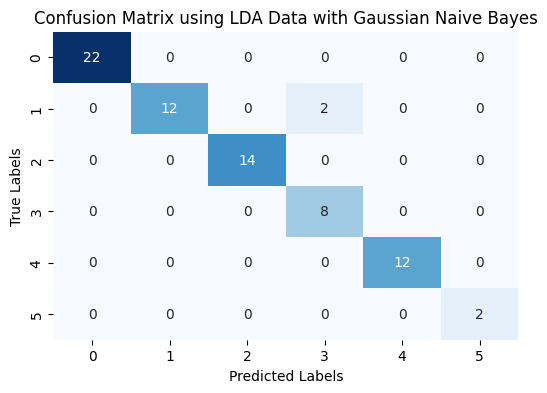

In [ ]:
# Naive Bayes (LDA data)
np.random.seed(42)
# Initialize Gaussian Naive Bayes model
gnb_lda = GaussianNB()

# Fit the model on the training data
gnb_lda.fit(X_train_lda, y_train_lda)

# Predicting on the test set
y_pred_gnb_lda = gnb_lda.predict(X_test_lda)

# Evaluating the accuracy
accuracy_gnb_lda = accuracy_score(y_test_lda, y_pred_gnb_lda)
print("Accuracy using LDA Data with Gaussian Naive Bayes:", accuracy_gnb_lda)

# Compute confusion matrix
cm_gnb_lda = confusion_matrix(y_test_lda, y_pred_gnb_lda)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gnb_lda, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix using LDA Data with Gaussian Naive Bayes")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
# List of model names
model_names = ['Logistic Regression', 'SVC', 'KNN', 'Random Forest', 'Gaussian Naive Bayes']

# List of accuracies for original data
accuracies_original = [accuracy, accuracy_svc, accuracy_knn, accuracy_rf, accuracy_gnb]

# List of accuracies for LDA-transformed data
accuracies_lda = [accuracy_lda, accuracy_svc_lda, accuracy_knn_lda, accuracy_rf_lda, accuracy_gnb_lda]

# Convert accuracies to percentages
accuracies_original_percent = [acc * 100 for acc in accuracies_original]
accuracies_lda_percent = [acc * 100 for acc in accuracies_lda]

# Print model names and their accuracies for original data
print("Model Accuracies for Original Data:")
for model, acc in zip(model_names, accuracies_original_percent):
    print(f"{model}: {acc:.2f}%")

# Print model names and their accuracies for LDA-transformed data
print("\nModel Accuracies for LDA-transformed Data:")
for model, acc in zip(model_names, accuracies_lda_percent):
    print(f"{model}: {acc:.2f}%")


Model Accuracies for Original Data:
Logistic Regression: 95.83%
SVC: 97.22%
KNN: 91.67%
Random Forest: 98.61%
Gaussian Naive Bayes: 83.33%

Model Accuracies for LDA-transformed Data:
Logistic Regression: 98.61%
SVC: 98.61%
KNN: 98.61%
Random Forest: 97.22%
Gaussian Naive Bayes: 97.22%


In [ ]:
# Define class labels
class_labels = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5']

# Original data
for model, acc, y_pred in zip(model_names, accuracies_original_percent, [y_pred, y_pred_svc, y_pred_knn, y_pred_rf, y_pred_gnb]):
    report = classification_report(y_test, y_pred, target_names=class_labels, zero_division=1)
    print(f"Classification Report for {model} (Accuracy: {acc:.2f}%):\n{report}")

# LDA-transformed data
for model, acc, y_pred_lda in zip(model_names, accuracies_lda_percent, [y_pred_lda, y_pred_svc_lda, y_pred_knn_lda, y_pred_rf_lda, y_pred_gnb_lda]):
    report_lda = classification_report(y_test_lda, y_pred_lda, target_names=class_labels, zero_division=1)
    print(f"Classification Report for {model} (Accuracy: {acc:.2f}%):\n{report_lda}")



Classification Report for Logistic Regression (Accuracy: 95.83%):
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        22
     Class 1       1.00      0.86      0.92        14
     Class 2       1.00      0.93      0.96        14
     Class 3       0.73      1.00      0.84         8
     Class 4       1.00      1.00      1.00        12
     Class 5       1.00      1.00      1.00         2

    accuracy                           0.96        72
   macro avg       0.95      0.96      0.95        72
weighted avg       0.97      0.96      0.96        72

Classification Report for SVC (Accuracy: 97.22%):
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        22
     Class 1       1.00      0.86      0.92        14
     Class 2       1.00      1.00      1.00        14
     Class 3       0.80      1.00      0.89         8
     Class 4       1.00      1.00      1.00        12
     Class 5    